# Lab02: Frequent itemset mining

- Student ID: 21127329
- Student name: Châu Tấn Kiệt

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Then create a folder named `ID` (for example, if your ID is 1234567, then name the folder `1234567`) Copy file notebook to this folder, compress and submit it on moodle.

**Contents:**

- Frequent itemset mining.

# 1. Preliminaries
## This is how it all started ...
- Rakesh Agrawal, Tomasz Imielinski, Arun N. Swami: Mining Association Rules between Sets of Items in Large Databases. SIGMOD Conference 1993: 207-216
- Rakesh Agrawal, Ramakrishnan Srikant: Fast Algorithms for Mining Association Rules in Large Databases. VLDB 1994: 487-499

**These two papers are credited with the birth of Data Mining**
## Frequent itemset mining (FIM)

Find combinations of items (itemsets) that occur frequently.
## Applications
- Items = products, transactions = sets of products someone bought in one trip to the store.
$\Rightarrow$ items people frequently buy together.
    + Example: if people usually buy bread and coffee together, we run a sale of bread to attract people attention and raise price of coffee.
- Items = webpages, transactions = words. Unusual words appearing together in a large number of documents, e.g., “Brad” and “Angelina,” may indicate an interesting relationship.
- Transactions = Sentences, Items = Documents containing those sentences. Items that appear together too often could represent plagiarism.

## Transactional Database
A transactional database $D$ consists of $N$ transactions: $D=\left\{T_1,T_2,...,T_N\right\}$. A transaction $T_n \in D (1 \le n \le N)$ contains one or more items and that $I= \left\{ i_1,i_2,…,i_M \right\}$ is the set of distinct items in $D$, $T_n \subset I$. Commonly, a transactional database is represented by a flat file instead of a database system: items are non-negative integers, each row represents a transaction, items in a transaction separated by space.

Example: 

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

30 31 32 

33 34 35 

36 37 38 39 40 41 42 43 44 45 46 

38 39 47 48 

38 39 48 49 50 51 52 53 54 55 56 57 58 

32 41 59 60 61 62 

3 39 48 

63 64 65 66 67 68 



# Definition

- Itemset: A collection of one or more items.
    + Example: {1 4 5}
- **k-itemset**: An itemset that contains k items.
- Support: Frequency of occurrence of an itemset.
    + Example: From the example above, item 3 appear in 2 transactions so its support is 2.
- Frequent itemset: An itemset whose support is greater than or equal to a `minsup` threshold

# The Apriori Principle
- If an itemset is frequent, then all of its subsets must also be frequent.
- If an itemset is not frequent, then all of its supersets cannot be frequent.
- The support of an itemset never exceeds the support of its subsets.
$$ \forall{X,Y}: (X \subseteq Y) \Rightarrow s(X)\ge s(Y)$$


# 2. Implementation

## The Apriori algorithm
Suppose:

$C_k$ candidate itemsets of size k.

$L_k$ frequent itemsets of size k.

The level-wise approach of Apriori algorithm can be descibed as follow:
1. k=1, $C_k$ = all items.
2. While $C_k$ not empty:
    3. Scan the database to find which itemsets in $C_k$ are frequent and put them into $L_k$.
    4. Use $L_k$ to generate a collection of candidate itemsets $C_{k+1}$ of size k+1.
    5. k=k+1.

### Import library

In [1]:
from collections import defaultdict

### Read data
First we have to read data from database

In [2]:

def readData(path):
    """
    Parameters
    --------------------------
        path: path of database D.
         
    --------------------------
    Returns
        data: a dictionary for representing database D
                 - keys: transaction tids
                 - values: itemsets.
        s: support of distict items in D.
    """
    data={}
    s=defaultdict(lambda: 0) # Initialize a dictionary for storing support of items in I.  
    with open(path,'rt') as f:
        tid=1
        for line in f:
            itemset=set(map(int,line.split())) # a python set is a native way for storing an itemset.
            for item in itemset:  
                s[item]+=1     #Why don't we compute support of items while reading data?
            data[tid]= itemset
            tid+=1
    
    return data, s

### Tree Projection

**I gave you pseudo code of Apriori algorithm above but we implement Tree Projection. Tell me the differences of two algorithms.**


**TODO:**

In [3]:
def joinset(a, b):
    '''
    Parameters
    -------------------
        2 itemsets a and b (of course they are at same branch in search space)
    
    -------------------
    return
        ret: itemset generated by joining a and b
    '''
    # TODO (hint: this function will be called in generateSearchSpace method.):
    merge = list(set(a).union(b))
    ret = sorted(merge)
    return ret

class TP:
    def __init__(self, data=None, s=None, minSup=None):
        self.data = data
        self.s = {}

        for key, support in sorted(s.items(), key=lambda item: item[1]):
            self.s[key] = support
        # TODO: why should we do this, answer it at the markdown below?

        self.minSup = minSup
        self.L = {}  # Store frequent itemsets mined from database
        self.runAlgorithm()

    def initialize(self):
        """
        Initialize search space at first step
        --------------------------------------
        We represent our search space in a tree structure
        """
        tree = {}

        search_space = {}
        for item, support in self.s.items():
            search_space[item] = {}

            search_space[item]['itemset'] = [item]
            ''' 
            python set does not remain elements order
            so we use a list to extend it easily when create new itemset 
            but why we store itemset in data by a python set???? '''
            # TODO: study about python set and its advantages,
            # answer at the markdown below.

            search_space[item]['pruned'] = False
            # TODO:
            # After finish implementing the algorithm tell me why should you use this
            # instead of delete item directly from search_space and tree.

            search_space[item]['support'] = support

            tree[item] = {}
            '''
            Why should i store an additional tree (here it called tree)? 
            Answer: This really help in next steps.

            Remember that there is always a big gap from theory to practicality
            and implementing this algorithm in python is not as simple as you think.
            '''

        return tree, search_space

    def computeItemsetSupport(self, itemset):

        '''Return support of itemset'''
        # TODO (hint: this is why i use python set in data)
        support = 0
        for val in self.data.values():
            if val >= itemset:
                support += 1
        return support
    
    def get_sub_tree(self, k, tree, search_space, itter_node):
        if k == 0:
            return search_space[itter_node]['support']
        subtree = search_space[itter_node]
        for node in subtree.keys():
            k-=1
            self.get_sub_tree(k,tree,search_space,node)


    def prune(self, k, tree, search_space):

        '''
        In this method we will find out which itemset in current search space is frequent
        itemset then add it to L[k]. In addition, we prune those are not frequent itemsets.
        '''
        if self.L.get(k) is None: self.L[k] = []
        # TODO
        items = list(tree.keys())
        for item in items:
            # Check if the itemset is frequent
            itemset = search_space[item]['itemset']
            support = self.computeItemsetSupport(set(itemset))
            print(support)
            if support >= self.minSup:
                # Add the itemset to L[k]
                search_space[item]['support'] = support 
                self.L[k].append((itemset, support))
            else:
                # Prune the itemset
                search_space[item]['pruned'] = True
        

    def generateSearchSpace(self, k, tree, search_space):
        '''
        Generate search space for exploring k+1 itemset. (Recursive function)
        '''
        items = list(tree.keys())
        ''' print search_space.keys() you will understand  
         why we need an additional tree, '''
        l = len(items)
        self.prune(k, tree, search_space)
        if l == 0: return  # Stop condition
        for i in range(l - 1):
            sub_search_space = {}
            sub_tree = {}
            a = items[i]
            if search_space[a]['pruned']: continue

            for j in range(i + 1, l):
                b = items[j]
                search_space[a][b] = {}
                tree[a][b] = {}
                # You really need to understand what am i doing here before doing work below.
                # (Hint: draw tree and search space to draft).
                # TODO:
                # First create newset using join set
                newset = joinset(search_space[a]['itemset'], search_space[b]['itemset'])
                # Second add newset to search_space
                search_space[a][b]['itemset'] = newset
                search_space[a][b]['pruned'] = False
                
            sub_search_space = search_space[a]
            sub_tree = tree[a]            
            #  Generate search_space for k+1-itemset
            self.generateSearchSpace(k + 1, sub_tree, sub_search_space)

    def runAlgorithm(self):
        tree, search_space = self.initialize()  # generate search space for 1-itemset
        self.generateSearchSpace(1, tree, search_space)

    def miningResults(self):
        return self.L

Ok, let's test on a typical dataset `chess`.

In [4]:
data, s= readData('chess.txt')

In [5]:
#
a=TP(data=data,s=s, minSup=3000)
print(a.miningResults())

[59]
[53]
[30]
[41]
[61]
[37]
[8]
[63]
[35]
[57]
[67]
[49]
[33]
[6]
[10]
[26]
[4]
[32]
[43]
[65]
[45]
[47]
[18]
[75]
[73]
[22]
[55]
[28]
[39]
[12]
[16]
[71]
[69]
[20]
[51]
[24]
[14]
[2]
[1]
[13]
[23]
[50]
[19]
[68]
[70]
[15]
[11]
[38]
[27]
[54]
[21]
[72]
[74]
[17]
[31]
[46]
[44]
[64]
[42]
[3]
[25]
[9]
[5]
[48]
[56]
[66]
[34]
[62]
[7]
[36]
[60]
[40]
[29]
[52]
[58]
[48, 56]
[48, 66]
[34, 48]
[48, 62]
[7, 48]
[36, 48]
[48, 60]
[40, 48]
[29, 48]
[48, 52]
[48, 58]
[48, 52, 58]
[56, 66]
[34, 56]
[56, 62]
[7, 56]
[36, 56]
[56, 60]
[40, 56]
[29, 56]
[52, 56]
[56, 58]
[29, 52, 56]
[29, 56, 58]
[29, 52, 56, 58]
[52, 56, 58]
[34, 66]
[62, 66]
[7, 66]
[36, 66]
[60, 66]
[40, 66]
[29, 66]
[52, 66]
[58, 66]
[40, 60, 66]
[29, 60, 66]
[52, 60, 66]
[58, 60, 66]
[29, 52, 60, 66]
[29, 58, 60, 66]
[29, 52, 58, 60, 66]
[52, 58, 60, 66]
[29, 52, 66]
[29, 58, 66]
[29, 52, 58, 66]
[52, 58, 66]
[34, 62]
[7, 34]
[34, 36]
[34, 60]
[34, 40]
[29, 34]
[34, 52]
[34, 58]
[29, 34, 40]
[34, 40, 52]
[34, 40, 58]
[29, 34,

### Answer questions here:
**Why don't we compute support of items while reading data?**

Because it is inefficient. To count the number of transactions that contain each itemset, we need to scan the entire dataset. As a result, computing the support of items while reading data would require keeping track of all count occurrences of itemsets, which can be computationally expensive.

**why should we do sort?**

Sorting can help improve the performance in several ways:
- Sorting the items in each transaction in lexicographic order can make it easier to generate candidate itemsets and check if they are present in the transactions. 
- Ordering the items by their frequency could help prune infrequent itemsets more efficiently, because we can prioritize the most frequent items when generating candidate itemsets.
- Additionally, sorting can help improve the performance of certain data structures, such as `set` in this case.

**Study about Python set and its advantages ?**

A `set` is a built-in data type in Python that is used to store collections of data. Set is a powerful data structure and has several advantages thanks to the following properties:
- **Uniqueness**: Sets automatically remove duplicate elements, which can be useful when we need collections of unique data.
- **Fast computation**: Sets are implemented as hash tables, checking if an element is in a set is very fast (an O(1) in time complexity).
- **Built-in mathematical operations**: Sets support common mathematical operations such as union, intersection, and difference. Very useful when we need to combine or compare collections of data. 
- **Unordered items**: Sets are unordered, which means that the order of elements in a set is not guaranteed. This can be helpful when we do not care about the order of elements and primarily focus on whether they are present or absent.

**After finish implementing the algorithm tell me why should you use this? Instead of delete item directly from search_space and tree.**

Deleting the item directly requires traversing to the item, which is an extra step and making it computationally expensive. Setting the status to "pruned" can reduce the time complexity significantly. Also, as the number of items generated in every runtime can be very large, so deleting them along is not a good idea.

**Apriori algorithm and Tree Projection, tell me the differences of two algorithms.**

The difference between Apriori algorithm and Tree Projection is the way they generate and prune itemsets. 
- Apriori uses breadth-first search (BFS) approach to generate next candidates
- Tree Projection expands the current left most node until no more nodes can be generated, then recursively goes back to the parent node and repeats the same process, which is the principle of depth-first search (DFS)


# 3. Churn analysis

In this section, you will use frequent itemset mining technique to analyze `churn` dataset (for any purposes). 

*Remember this dataset is not represented as a transactional database, first thing that you have to do is transforming it into a flat file.  

Importing necessary libraries

In [6]:
# TODO
# YOUR CODE HERE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Read dataset

In [7]:
df = pd.read_csv("churn.txt")

In [8]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

Getting customers assosiated with churn

In [10]:
df_true = df[df['Churn?'] == 'True.']
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [11]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 10 to 3323
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           483 non-null    object 
 1   Account Length  483 non-null    int64  
 2   Area Code       483 non-null    int64  
 3   Phone           483 non-null    object 
 4   Int'l Plan      483 non-null    object 
 5   VMail Plan      483 non-null    object 
 6   VMail Message   483 non-null    int64  
 7   Day Mins        483 non-null    float64
 8   Day Calls       483 non-null    int64  
 9   Day Charge      483 non-null    float64
 10  Eve Mins        483 non-null    float64
 11  Eve Calls       483 non-null    int64  
 12  Eve Charge      483 non-null    float64
 13  Night Mins      483 non-null    float64
 14  Night Calls     483 non-null    int64  
 15  Night Charge    483 non-null    float64
 16  Intl Mins       483 non-null    float64
 17  Intl Calls      483 non-null    i

- It seems the dataset is clean, but there are things that are noticeable
- Based on the attributes, some are very likely to correlate to each other:
    - Day Mins, Day Calls, Day Charge [1]
    - Eve Mins, Eve Calls, Eve Charge [2]
    - Night Mins, Night Calls, Night Charge [3]
    - Intl Mints, Intl Calls, Intl Charge [4]

- Let's plot them out to check


Plotting Day Mins, Day Calls, Day Charge

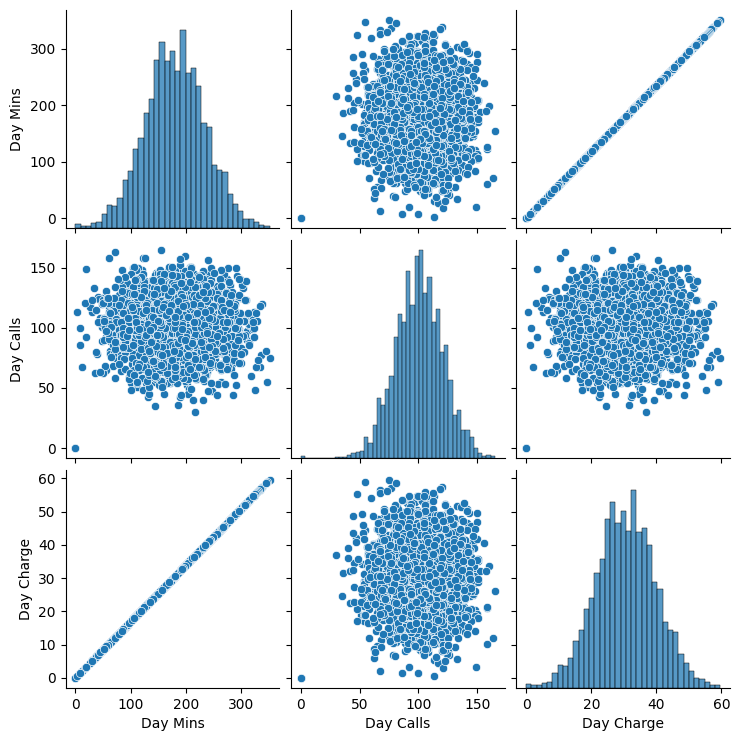

In [12]:
sns.pairplot(df[['Day Mins', 'Day Calls', 'Day Charge']])
plt.show()

Plotting Eve Mins, Eve Calls, Eve Charge

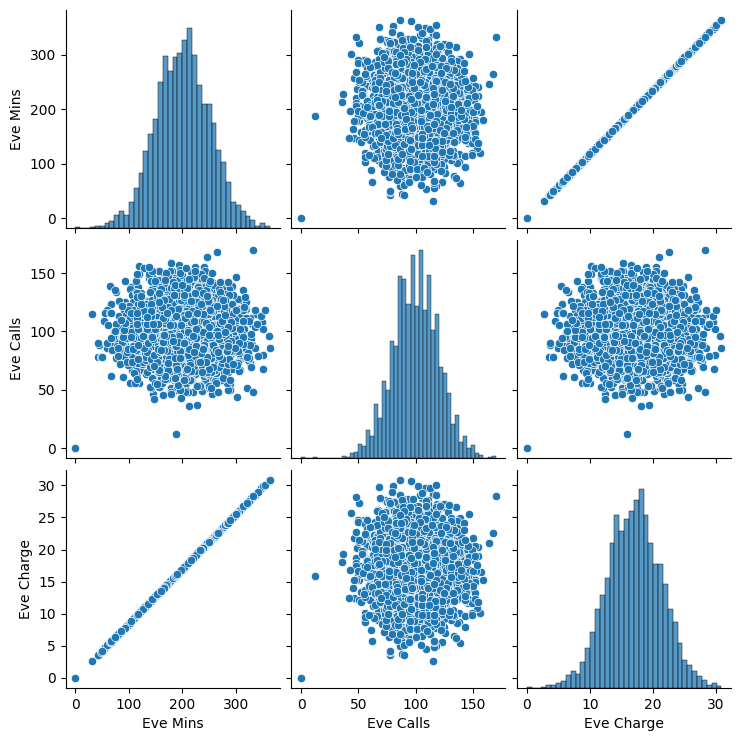

In [13]:
sns.pairplot(df[['Eve Mins', 'Eve Calls', 'Eve Charge']])
plt.show()

Plotting Night Mins, Night Calls, Night Charge

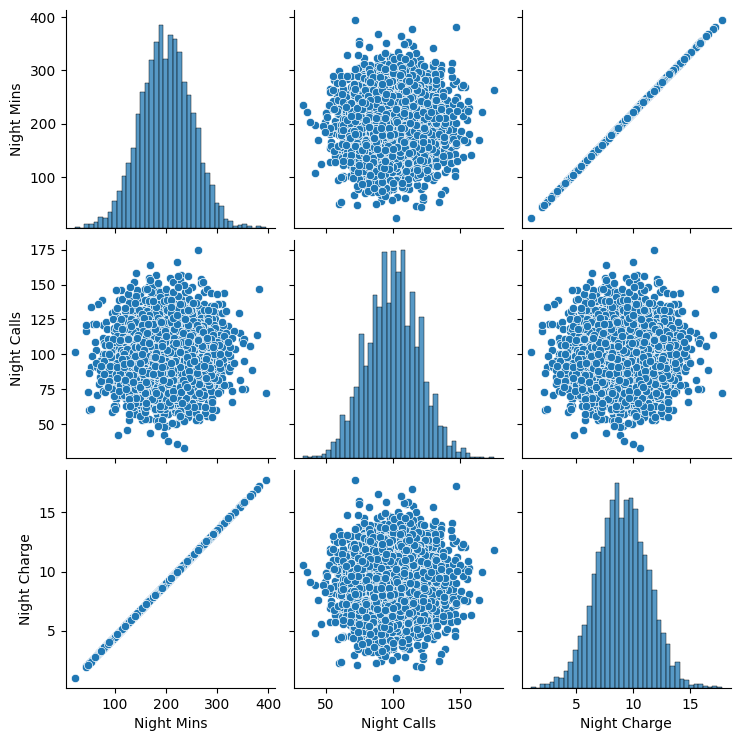

In [14]:
sns.pairplot(df[['Night Mins', 'Night Calls', 'Night Charge']])
plt.show()

Plotting Intl Mints, Intl Calls, Intl Charge

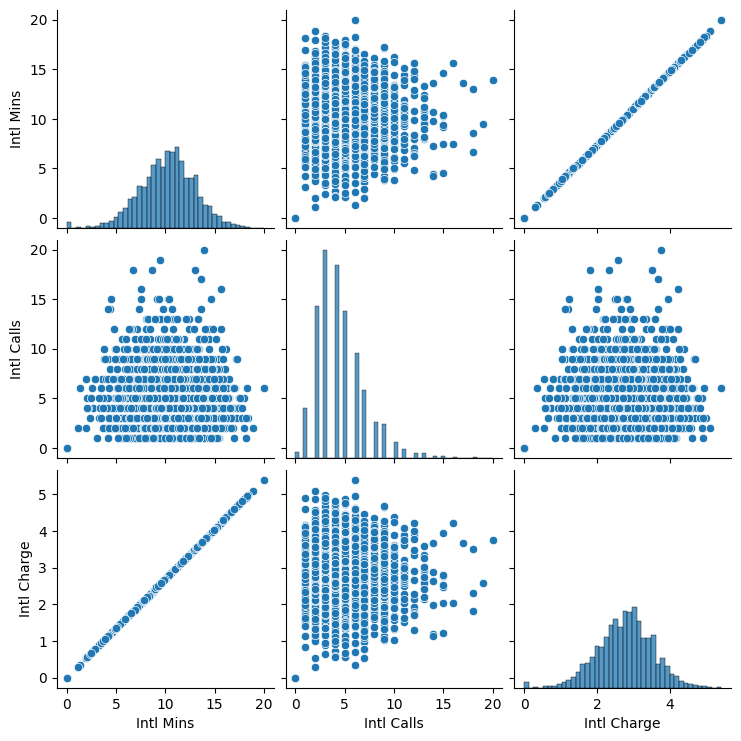

In [15]:
sns.pairplot(df[['Intl Mins', 'Intl Calls', 'Intl Charge']])
plt.show()

Now that's confirmed, let's drop these charge columns since they depend on the Mins 

In [16]:
df_true = df_true.drop(columns=['Day Charge', 'Eve Charge', 'Night Charge', 'Intl Charge'])
df_true.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Churn?
10,IN,65,415,329-6603,no,no,0,129.1,137,228.5,83,208.8,111,12.7,6,4,True.
15,NY,161,415,351-7269,no,no,0,332.9,67,317.8,97,160.6,128,5.4,9,4,True.
21,CO,77,408,393-7984,no,no,0,62.4,89,169.9,121,209.6,64,5.7,6,5,True.
33,AZ,12,408,360-1596,no,no,0,249.6,118,252.4,119,280.2,90,11.8,3,1,True.
41,MD,135,408,383-6029,yes,yes,41,173.1,85,203.9,107,122.2,78,14.6,15,0,True.


Convert dataframe to transactions

In [17]:
def write_churn_transactions(path, data):
    with open(path, 'wt') as f:
        headers = []
        lines = []
        for col in data.columns:
            words = col.split()
            s = ''.join(word for word in words)
            headers.append(s)
        for row in data.values:
            lines.append(row)
        for line in lines:
            s = ''.join(f'{headers[i]}={line[i]} ' for i in range(len(headers) - 1))
            s += f'{headers[len(headers) - 1]}={line[len(headers) - 1]}\n'
            f.write(s)

In [18]:
write_churn_transactions('churn_true.txt',df_true)

Read the data file, and apply things similar to above

In [19]:
def readChurnData(path):
    data={}
    s=defaultdict(lambda: 0)
    with open(path,'rt') as f:
        tid=1
        for line in f:
            itemset=set(map(str,line.split())) 
            for item in itemset:  
                s[item]+=1     
            data[tid]= itemset
            tid+=1

    return data, s

In [20]:
data, s = readChurnData('churn_true.txt')
a = TP(data=data, s=s, minSup=200)
a.miningResults()

['DayMins=129.1']
['Phone=329-6603']
['EveMins=228.5']
['EveMins=317.8']
['NightMins=160.6']
['DayMins=332.9']
['IntlMins=5.4']
['Phone=351-7269']
['Phone=393-7984']
['DayMins=62.4']
['NightMins=209.6']
['Phone=360-1596']
['DayMins=249.6']
['NightMins=280.2']
['AccountLength=12']
['EveMins=252.4']
['DayMins=173.1']
['Phone=383-6029']
['EveMins=203.9']
['NightMins=122.2']
['IntlMins=14.6']
['DayMins=159.1']
['Phone=398-1294']
['EveMins=231.3']
['Phone=353-3759']
['DayMins=151.0']
['Phone=370-7574']
['EveMins=75.3']
['DayMins=198.4']
['NightMins=148.6']
['Phone=374-8042']
['DayMins=178.9']
['EveMins=181.0']
['Phone=374-5353']
['NightMins=270.1']
['DayMins=300.3']
['EveMins=77.1']
['Phone=360-1171']
['DayMins=61.6']
['NightMins=173.0']
['DayMins=210.6']
['Phone=395-3026']
['EveMins=249.2']
['Phone=402-1251']
['DayMins=157.9']
['NightMins=189.6']
['Phone=358-9095']
['EveMins=247.6']
['NightCalls=68']
['DayMins=237.9']
['DayMins=203.4']
['Phone=334-1275']
['AccountLength=155']
['NightMins=1

{1: [(['AreaCode=415'], 236),
  (["Int'lPlan=no"], 346),
  (['VMailPlan=no'], 403),
  (['VMailMessage=0'], 403),
  (['Churn?=True.'], 483)],
 2: [(['AreaCode=415', 'VMailPlan=no'], 202),
  (['AreaCode=415', 'VMailMessage=0'], 202),
  (['AreaCode=415', 'Churn?=True.'], 236),
  (["Int'lPlan=no", 'VMailPlan=no'], 302),
  (["Int'lPlan=no", 'VMailMessage=0'], 302),
  (['Churn?=True.', "Int'lPlan=no"], 346),
  (['VMailMessage=0', 'VMailPlan=no'], 403),
  (['Churn?=True.', 'VMailPlan=no'], 403),
  (['Churn?=True.', 'VMailMessage=0'], 403)],
 3: [(['AreaCode=415', 'VMailMessage=0', 'VMailPlan=no'], 202),
  (['AreaCode=415', 'Churn?=True.', 'VMailPlan=no'], 202),
  (['AreaCode=415', 'Churn?=True.', 'VMailMessage=0'], 202),
  (["Int'lPlan=no", 'VMailMessage=0', 'VMailPlan=no'], 302),
  (['Churn?=True.', "Int'lPlan=no", 'VMailPlan=no'], 302),
  (['Churn?=True.', "Int'lPlan=no", 'VMailMessage=0'], 302),
  (['Churn?=True.', 'VMailMessage=0', 'VMailPlan=no'], 403)],
 4: [(['AreaCode=415', 'Churn?=Tr

Let's do the same thing with those having Churn = False

In [21]:
df_false = df[df['Churn?'] == 'False.']
df_false.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [22]:
df_false = df_false.drop(columns=['Day Charge', 'Eve Charge', 'Night Charge', 'Intl Charge'])

In [23]:
write_churn_transactions('churn_false.txt',df_false)

In [24]:
data, s = readChurnData('churn_false.txt')
a = TP(data=data, s=s, minSup=200)
a.miningResults()

['DayMins=265.1']
['Phone=382-4657']
['Phone=371-7191']
['EveMins=121.2']
['Phone=358-1921']
['DayMins=299.4']
['Phone=375-9999']
['EveMins=61.9']
['DayMins=166.7']
['Phone=330-6626']
['DayMins=223.4']
['Phone=391-8027']
['EveMins=348.5']
['Phone=355-9993']
['NightMins=211.8']
['Phone=329-9001']
['EveMins=103.1']
['EveMins=351.6']
['Phone=335-4719']
['DayMins=258.6']
['Phone=330-8173']
['NightMins=326.4']
['Phone=344-9403']
['Phone=363-1107']
['EveMins=104.9']
['Phone=394-8006']
['Phone=366-9238']
['DayMins=120.7']
['EveMins=280.9']
['NightMins=89.3']
['Phone=350-8884']
['Phone=386-2923']
['EveMins=218.2']
['Phone=356-2992']
['Phone=373-2782']
['Phone=396-5800']
['DayMins=155.1']
['IntlCalls=19']
['EveMins=72.9']
['Phone=358-1958']
['DayMins=110.4']
['Phone=350-2565']
['DayMins=81.1']
['Phone=343-4696']
['EveMins=245.2']
['EveMins=277.1']
['Phone=331-3698']
['Phone=357-3817']
['NightMins=102.1']
['Phone=418-6412']
['Phone=353-2630']
['Phone=410-7789']
['Phone=416-8428']
['DayMins=84.8'

['Phone=402-7746']
['Phone=332-1494']
['DayMins=97.6']
['EveMins=105.5']
['Phone=388-6223']
['EveMins=273.6']
['Phone=404-9539']
['Phone=341-7332']
['NightMins=307.1']
['Phone=338-7886']
['Phone=332-5596']
['Phone=348-9945']
['Phone=407-1896']
['DayMins=191.2']
['Phone=398-9408']
['Phone=369-8005']
['Phone=346-2530']
['EveMins=231.0']
['Phone=400-5984']
['NightMins=260.8']
['Phone=351-1007']
['Phone=345-5980']
['DayMins=94.7']
['EveMins=154.4']
['Phone=368-8964']
['Phone=358-1912']
['DayMins=195.3']
['Phone=379-3132']
['EveMins=297.8']
['NightMins=232.7']
['Phone=340-9910']
['EveMins=78.3']
['Phone=396-2719']
['Phone=369-6204']
['NightMins=174.5']
['NightMins=268.8']
['Phone=410-3782']
['Phone=404-4481']
['Phone=383-9255']
['Phone=418-9385']
['Phone=360-9676']
['Phone=385-4715']
['NightMins=105.4']
['Phone=414-2695']
['EveCalls=49']
['Phone=331-5999']
['Phone=337-7739']
['Phone=388-6658']
['DayMins=224.8']
['Phone=405-6943']
['DayMins=261.2']
['Phone=382-4084']
['Phone=352-8249']
['Pho

{1: [(['IntlCalls=6'], 293),
  (['IntlCalls=2'], 381),
  (['CustServCalls=3'], 385),
  (['IntlCalls=5'], 419),
  (['IntlCalls=4'], 540),
  (['IntlCalls=3'], 570),
  (['CustServCalls=0'], 605),
  (['CustServCalls=2'], 672),
  (['AreaCode=510'], 715),
  (['AreaCode=408'], 716),
  (['VMailPlan=yes'], 842),
  (['CustServCalls=1'], 1059),
  (['AreaCode=415'], 1419),
  (['VMailPlan=no'], 2008),
  (['VMailMessage=0'], 2008),
  (["Int'lPlan=no"], 2664),
  (['Churn?=False.'], 2850)],
 2: [(['IntlCalls=6', 'VMailPlan=no'], 215),
  (['IntlCalls=6', 'VMailMessage=0'], 215),
  (["Int'lPlan=no", 'IntlCalls=6'], 271),
  (['Churn?=False.', 'IntlCalls=6'], 293),
  (['IntlCalls=2', 'VMailPlan=no'], 271),
  (['IntlCalls=2', 'VMailMessage=0'], 271),
  (["Int'lPlan=no", 'IntlCalls=2'], 381),
  (['Churn?=False.', 'IntlCalls=2'], 381),
  (['CustServCalls=3', 'VMailPlan=no'], 294),
  (['CustServCalls=3', 'VMailMessage=0'], 294),
  (['CustServCalls=3', "Int'lPlan=no"], 362),
  (['Churn?=False.', 'CustServCalls